# Wine Reviews

[wine reviews](https://www.kaggle.com/zynicide/wine-reviews) 数据集下载于kaggle。它收集了共计129971条红酒的数据，记录了名称、产地、酒厂、价格、名牌、描述等信息。具体的属性如下：

|字段|描述|数据类型|
|:---:|:---:|:---:|
|id|编号|int|
|points|国家|string|
|description|葡萄酒的描述|string|
|designation|葡萄园的名称|string|
|points|葡萄酒的得分|int|
|price|葡萄酒的价格|int|
|province|省 |string|
|region_1|区域1|string|
|region_2|区域2 |string|
|winery|酒厂名称 |string|
|variety|葡萄的种类|string|
|taster_name|品酒师姓名|string|
|taster_twitter_handle|品酒师推特账号|string|




参考连接：[知乎-葡萄酒的SQL分析](https://zhuanlan.zhihu.com/p/59840855?from_voters_page=true)

In [1]:
import json
from matplotlib import pyplot as plt
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

### 一、数据可视化和摘要

由于description属性表示品酒师对酒品的描述，每个酒的描述差异非常大。因此先不做分析。

由于taster_name、taster_twitter_handle代表品酒师姓名、品酒师推特账号，它们之间具有一一对应关系，因此只分析taster_name。

对于标称属性，给出每个可能取值的频数，并绘制条形统计图

对于数值属性，给出它们的5数概括和缺失值个数，并绘制盒图、条形统计图

In [2]:
# 读取数据

# 数据集根路径
data_path = "C:/Users/王欣哲/Desktop/数据挖掘/数据集/Wine Reviews/"
data_csv = data_path + "winemag-data-130k-v2.csv"
data_json = data_path + "winemag-data-130k-v2.json"

# 读取json数据
data = None
with open(data_json,'r') as f:
	data = json.load(f)

# 数据集基本信息
print("数据条数:",len(data))
print("字段名:",data[0].keys())
print("条目样例:",data[0])


数据条数: 129971
字段名: dict_keys(['points', 'title', 'description', 'taster_name', 'taster_twitter_handle', 'price', 'designation', 'variety', 'region_1', 'region_2', 'province', 'country', 'winery'])
条目样例: {'points': '87', 'title': 'Nicosia 2013 Vulkà Bianco  (Etna)', 'description': "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", 'taster_name': 'Kerin O’Keefe', 'taster_twitter_handle': '@kerinokeefe', 'price': None, 'designation': 'Vulkà Bianco', 'variety': 'White Blend', 'region_1': 'Etna', 'region_2': None, 'province': 'Sicily & Sardinia', 'country': 'Italy', 'winery': 'Nicosia'}


In [3]:
# 数据预处理 清理None, 方便后续处理

# 将None字段替换 避免潜在的Python语法错误
meta_data = {"points": int, "price": int, "country": str, "description": str, "designation": str,
			"province": str,"region_1": str,"region_2": str, "winery": str,	"variety": str,	
			"taster_name": str,	"taster_twitter_handle": str}
for row in data:
	for key in row.keys():
		if (row[key] == None) or (row[key] == "None"):
			if meta_data[key] == str:
				row[key] = "None"
			else:
				row[key] = 0

# 将数值属性的变量类型转为数字
for row in data:
	row['points'] = int(row['points'])
	row['price'] = int(row['price'])


先分析 points、price 两个数值属性

five number:
    min: 80
    Q1: 86.0
    median: 88.0
    Q3: 91.0
    max: 100


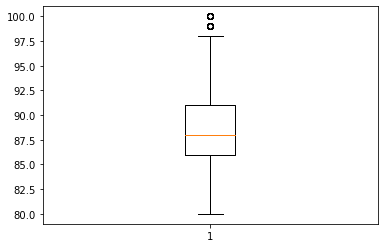

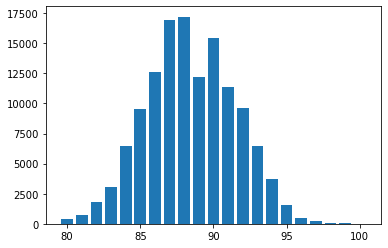

In [21]:
# points 数值属性
points = [x['points'] for x in data]

# 计算5数概括
points_five_num = five_num(points)
print_five_num(points_five_num)		# print

# 绘制盒图
plt_box(points)

# 绘制条形统计图
plt_bar(data, "points")

five number:
    min: 0
    Q1: 15.0
    median: 25.0
    Q3: 40.0
    max: 3300


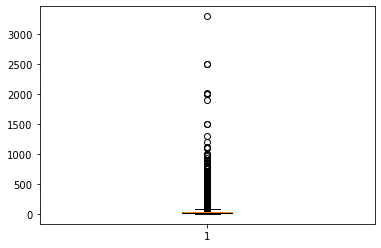

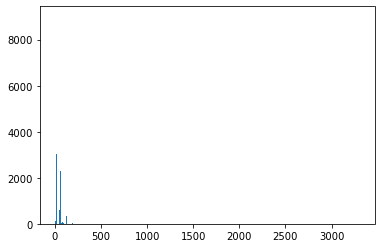

In [23]:
# price 数值属性
price = [x['price'] for x in data]

# 计算5数概括
price_five_num = five_num(price)
print_five_num(price_five_num)		# print

# 绘制盒图
plt_box(price)

# 绘制条形统计图
plt_bar(data,"price")

top 7:
    US  54504
    France  22093
    Italy  19540
    Spain  6645
    Portugal  5691
    Chile  4472
    Argentina  3800


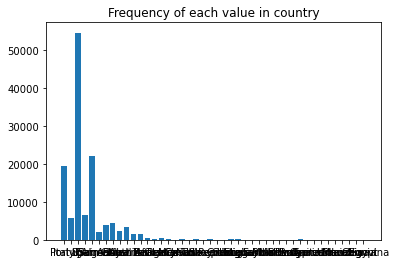

In [27]:
# country 标称属性
country_count = cal_count(data, "country")

# 输出频率前7的country
print_top_7(country_count)

# 绘制条形图
plt.title("Frequency of each value in country")
plt.bar(country_count.keys(), country_count.values())
plt.show()


top 7:
    California  36247
    Washington  8639
    Bordeaux  5941
    Tuscany  5897
    Oregon  5373
    Burgundy  3980
    Northern Spain  3851


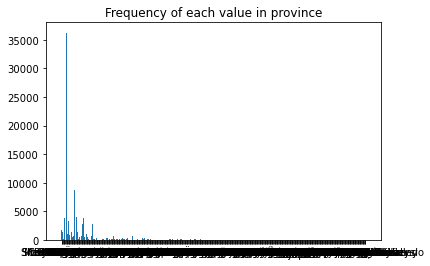

In [29]:
# province 标称属性
province_count = cal_count(data, "province")

# 输出频率前7的province
print_top_7(province_count)

# 绘制条形图
plt.title("Frequency of each value in province")
plt.bar(province_count.keys(), province_count.values())
plt.show()


top 7:
    None  26244
    Roger Voss  25514
    Michael Schachner  15134
    Kerin O’Keefe  10776
    Virginie Boone  9537
    Paul Gregutt  9532
    Matt Kettmann  6332


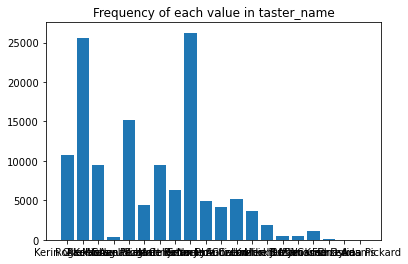

In [30]:
# taster_name 标称属性
taster_name_count = cal_count(data, "taster_name")

# 输出频率前7的taster_name
print_top_7(taster_name_count)

# 绘制条形图
plt.title("Frequency of each value in taster_name")
plt.bar(taster_name_count.keys(), taster_name_count.values())
plt.show()


top 7:
    Wines & Winemakers  222
    Testarossa  218
    DFJ Vinhos  215
    Williams Selyem  211
    Louis Latour  199
    Georges Duboeuf  196
    Chateau Ste. Michelle  194


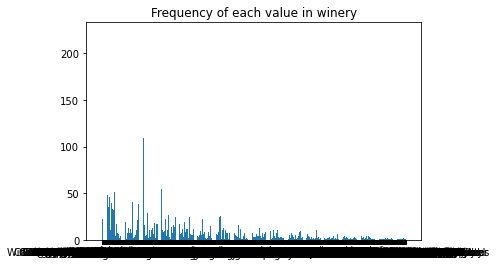

In [31]:
# winery 标称属性
winery_count = cal_count(data, "winery")

# 输出频率前7的winery
print_top_7(winery_count)

# 绘制条形图
plt.title("Frequency of each value in winery")
plt.bar(winery_count.keys(), winery_count.values())
plt.show()


top 10: [('Pinot Noir', 13272), ('Chardonnay', 11753), ('Cabernet Sauvignon', 9472), ('Red Blend', 8946), ('Bordeaux-style Red Blend', 6915), ('Riesling', 5189), ('Sauvignon Blanc', 4967), ('Syrah', 4142), ('Rosé', 3564), ('Merlot', 3102)]


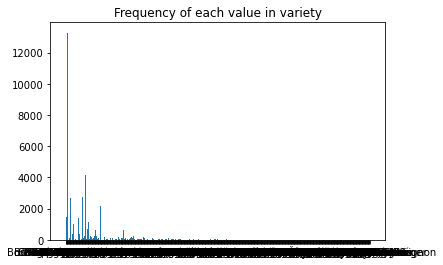

In [26]:
# variety 标称属性
variety_count = {}
for row in data:
	if not (row["variety"] in variety_count.keys()):
		variety_count[row["variety"]] = 1
	else:
		variety_count[row["variety"]] += 1

# 输出频率前10的variety
variety_sorted = sorted(variety_count.items(),key=lambda kv: (kv[1],kv[0]),reverse=True)
print("top 7:")
for c in  variety_sorted[0:7]:
	print(f"    {c[0]}  {c[1]}")

# 绘制条形图
plt.title("Frequency of each value in variety")
plt.bar(variety_count.keys(), variety_count.values())
plt.show()

**总结**
在对数据的可视化和摘要过程中，比较重要的是体现出数据的整体分布情况和特点，并选用合适的图表对数据生成摘要。针对数值属性和标称属性，生成摘要的方法也各不相同。对数值属性来说，选用箱形图和条形统计图可以明了的说明数据的大致分布形态。而对于标称属性，条形统计图也能够清晰的说明各个属性取值的频率。但是对于标称属性数值取值较多的情况，选用条形统计图则可能无法明确的指出属性的取值分布情况和特点。

### 二、数据缺失的处理

在上述的分析中我们看到，部分字段存在大量的缺失数据，如price、region_1、taster_twitter_header等。产生这些数据缺失的原因也不尽相同。price字段的数据缺失出现的概率较低，这可能是由于酒品价格的偶然丢失而造成的。region_1、region_2字段出现数据缺失的概率较高，这可能是因为这两个的属性均描述酒品的产地，而除了非常出名的产地外绝大部分酒品并不需要过于详尽的产地标注，因此这两个字段出先数据缺失的概率较高。taster_twitter_hader字段也有较高的数据缺失概率，这可能是由于一些品酒师可能没有twitter账号。每一种数缺失的背后原因都不相同，不同的原因也决定了不同字段数据缺失量的大小。

In [27]:
# 读取原始数据
_data = None
with open(data_json,'r') as f:
	_data = json.load(f)

# 将数值属性转为int数，方便运算
for row in _data:
	row['points'] = int(row['points'])
	row['price'] = int(row['price']) if row['price'] !=None else None

#### 0、分析哪些列存在数据缺失

In [32]:
def find_None_col(data):
	for col in data[0].keys():
		has_none = False
		for row in data:
			if row[col] == None:
				has_none = True
				break
		if has_none:
			print(f"Have None:True    col:{col}")
		else:
			print(f"Have None:False   col:{col}")
			
find_None_col(_data)

Have None:False   col:points
Have None:False   col:title
Have None:False   col:description
Have None:True    col:taster_name
Have None:True    col:taster_twitter_handle
Have None:True    col:price
Have None:True    col:designation
Have None:True    col:variety
Have None:True    col:region_1
Have None:True    col:region_2
Have None:True    col:province
Have None:True    col:country
Have None:False   col:winery


#### 1、将缺失数据剔除

In [29]:
# 对每一个数据，若存在空属性，则将其剔除
print(f'Before eliminate data len:{len(_data)}')

data_elim = [x.copy() for x in _data]	# deep copy
data_elim = [x for x in data_elim if not (None in x.values())]	
print(f'After eliminate data len:{len(data_elim)}')


Before eliminate data len:129971
After eliminate data len:22387


#### 2、填充高频值

In [31]:
# 对每一个column，先计算高频值，再用其填充空属性
def cal_high_freq_val(data,column):
	count = {}
	for row in data:
		if not (row[column] in count.keys()):
			count[row[column]] = 1
		else:
			count[row[column]] += 1
	data_sorted = sorted(count.items(),key=lambda kv: (kv[1], kv[0]), reverse=True)
	return data_sorted[0]

data_fill_freq = [x.copy() for x in _data]	# deep copy
for col in data_fill_freq[0].keys():
	high_freq_val ,count= cal_high_freq_val(data_elim, col)
	print(f"Column:{col}  high_freq_val:{high_freq_val}  count:{count}")
	for row in data_fill_freq:
		if row[col] == None:
			row[col] = high_freq_val
print()

find_None_col(data_fill_freq)


Column:points  high_freq_val:90  count:3280
Column:title  high_freq_val:Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)  count:6
Column:description  high_freq_val:Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.  count:3
Column:taster_name  high_freq_val:Virginie Boone  count:6422
Column:taster_twitter_handle  high_freq_val:@vboone  count:6422
Column:price  high_freq_val:30  count:1066
Column:designation  high_freq_val:Estate  count:809
Column:variety  high_freq_val:Pinot Noir  count:4788
Column:region_1  high_freq_val:Columbia Valley (WA)  count:2488
Column:region_2  high_freq_val:Columbia Valley  count:5532
Column:province  high_freq_val:California  count:12900
Column:country  high_freq_val:US  count:22387
Column:winery  high_freq_val:Columbia Crest  count:157

Hav

#### 3、通过属性的相关关系来填补缺失值

针对不同列之间的相关关系特点，采用不同的方式对缺失值进行填充。

In [33]:
def find_row_by_col_val(_data,col,val):
	for row in _data:
		if row[col] == val:
			return row

# taster_name、taster_twitter_handle之间是一一对应关系
data_fill_attr_relation = [x.copy() for x in _data]	# deep copy
for row in data_fill_attr_relation:
	if row['taster_name'] == None:
		if row['taster_twitter_handle'] == None:
			# all None continue
			pass
		else:
			row['taster_name'] = find_row_by_col_val(data_fill_attr_relation, "taster_twitter_handle", row['taster_twitter_handle'])['taster_name']
	else:
		if row['taster_twitter_handle'] == None:
			row['taster_twitter_handle'] = find_row_by_col_val(data_fill_attr_relation, "taster_name", row['taster_name'])['taster_twitter_handle']
		else:
			# all Nont None continue
			pass
find_None_col(data_fill_attr_relation)

Have None:False   col:points
Have None:False   col:title
Have None:False   col:description
Have None:True    col:taster_name
Have None:True    col:taster_twitter_handle
Have None:True    col:price
Have None:True    col:designation
Have None:True    col:variety
Have None:True    col:region_1
Have None:True    col:region_2
Have None:True    col:province
Have None:True    col:country
Have None:False   col:winery


In [36]:
# price、points之间应存在较强相关关系  
# 这里的运行速度较慢，可以考虑对算法进行优化
points_price_dick = {}
for row in data_fill_attr_relation:
	if row['price'] == None:
		res = 0
		cnt = 0
		if row['points'] in points_price_dick.keys():
			row['price'] = points_price_dick[row['points']]
		else:
			for _row in _data:
				if _row['points'] == row['points'] :
					if _row['price'] !=None:
						res += int(_row['price'])
						cnt+=1
			if cnt != 0:
				row['price'] = int(res/cnt)
				points_price_dick[row['points']] = row['price']
			else:
				points_price_dick[row['points']] = None


find_None_col(data_fill_attr_relation)

Have None:False   col:points
Have None:False   col:title
Have None:False   col:description
Have None:True    col:taster_name
Have None:True    col:taster_twitter_handle
Have None:False   col:price
Have None:True    col:designation
Have None:True    col:variety
Have None:True    col:region_1
Have None:True    col:region_2
Have None:True    col:province
Have None:True    col:country
Have None:False   col:winery


In [38]:
# 对填充后仍然缺失的属性，采用直接剔除的办法进行处理
print(f'Before eliminate data len:{len(_data)}')
data_fill_attr_relation = [x for x in data_fill_attr_relation if not (None in x.values())]
print(f'After eliminate data len:{len(data_fill_attr_relation)}')

Before eliminate data len:129971
After eliminate data len:22524


#### 4、通过数据对象之间的相似性来填补缺失值

本方法重点在于评估对象间相似性的方法。对于存在缺失值的对象，寻找与其最相似的对象，并根据找的对象的属性信息，对缺失值进行填充。

In [40]:
# 由于需要进行大量的对象间距离计算，因此本方法的时间复杂度较高。
# 可以进一步考虑优化的策略
numeric = ['price', 'points']
nominal = [ 'title', 'description', 'taster_name', 
			'taster_twitter_handle',  'designation', 
			'variety', 'region_1', 'region_2', 'province', 
			'country', 'winery']
def cal_distance(row1,row2):
	numeric_dist = 0
	for col in numeric:
		if (row1[col] !=None) and (row2[col] != None):
			numeric_dist += abs(int(row1[col])-int(row2[col]))
	nominal_dist = 0
	for col in nominal:
		if (row1[col] !=None) and (row2[col] != None):
			if row1[col] != row2[col]:
				nominal_dist += 1
	return numeric_dist + nominal_dist

def find_min_dist_row(data,row):
	min_dist = 999999999
	res = None
	for _row in data:
		dist = cal_distance(_row, row)
		if dist < min_dist:
			min_dist = dist
			res = _row
	return res

data_fill_obj_similarity = _data.copy()
for row in data_fill_obj_similarity:
	if None in row.values():
		min_dist_row = find_min_dist_row(data_fill_obj_similarity, row)
		for k in row.keys():
			if row[k] == None:
				row[k] = min_dist_row[k]
find_None_col(data_fill_attr_relation)

KeyboardInterrupt: 

#### 5、新旧数据集可视化对比

由于可对比的属性较多，因此选择几个具有代表性的标称属性、数值属性进行对比。

Eliminate:
five number:
    min: 80
    Q1: 88.0
    median: 90.0
    Q3: 92.0
    max: 100


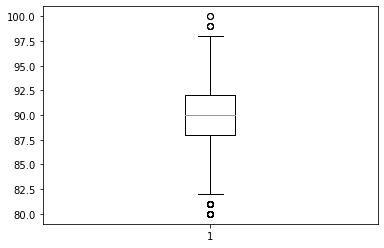

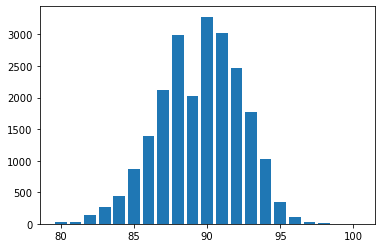

-------------------------
Fill Freq:
five number:
    min: 80
    Q1: 86.0
    median: 88.0
    Q3: 91.0
    max: 100


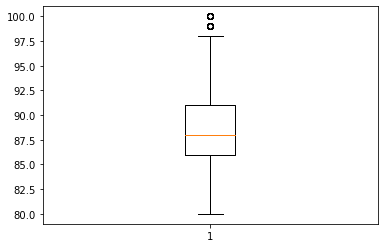

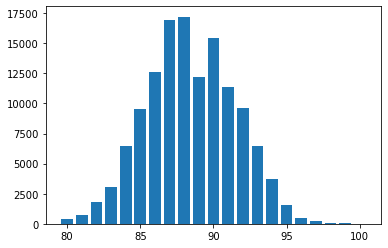

-------------------------
Attr Relation
five number:
    min: 80
    Q1: 88.0
    median: 90.0
    Q3: 92.0
    max: 100


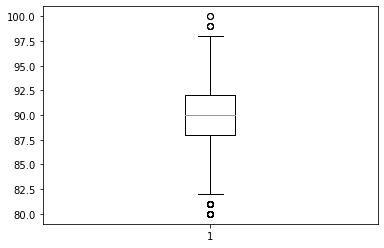

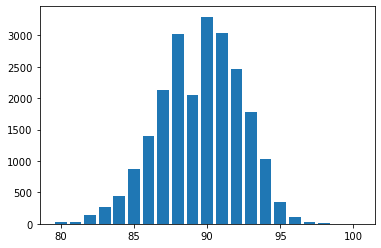

In [45]:
# points对比
def compare_points(data):
	points = [x['points'] for x in data]
	# 计算5数概括
	points_five_num = five_num(points)
	print_five_num(points_five_num)		# print

	# 绘制盒图
	plt_box(points)

	# 绘制条形统计图
	plt_bar(data,"points")

print("Eliminate:")
compare_points(data_elim)
print("-------------------------")
print("Fill Freq:")
compare_points(data_fill_freq)
print("-------------------------")
print("Attr Relation")
compare_points(data_fill_attr_relation)
# print("-------------------------")
# print("Object Relation:")
# compare_points(data_fill_obj_similarity)
# print("-------------------------")


Eliminate:
five number:
    min: 4
    Q1: 25.0
    median: 36.0
    Q3: 50.0
    max: 2013


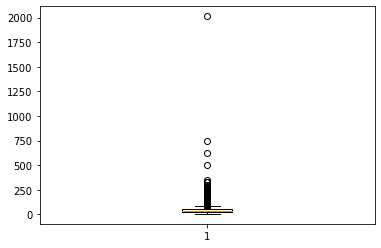

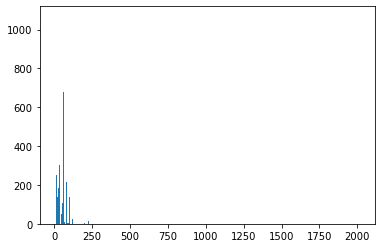

-------------------------
Fill Freq:
five number:
    min: 4
    Q1: 18.0
    median: 28.0
    Q3: 40.0
    max: 3300


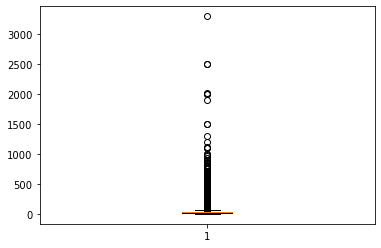

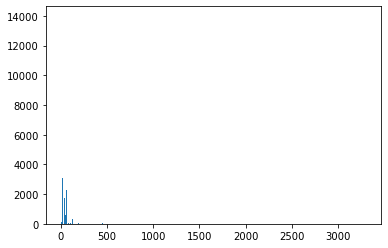

-------------------------
Attr Relation
five number:
    min: 4
    Q1: 25.0
    median: 36.0
    Q3: 50.0
    max: 2013


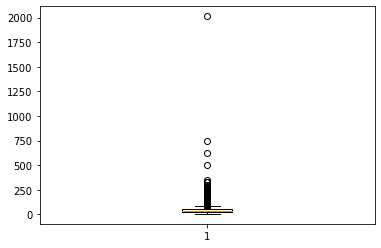

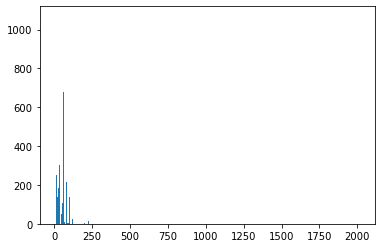

In [48]:
# prise对比
def compare_price(data):
	price = [x['price'] for x in data]
	# 计算5数概括
	prise_five_num = five_num(price)
	print_five_num(prise_five_num)		# print

	# 绘制盒图
	plt_box(price)

	# 绘制条形统计图
	plt_bar(data,"price")

print("Eliminate:")
compare_price(data_elim)
print("-------------------------")
print("Fill Freq:")
compare_price(data_fill_freq)
print("-------------------------")
print("Attr Relation")
compare_price(data_fill_attr_relation)
# print("-------------------------")
# print("Object Relation:")
# compare_price(data_fill_obj_similarity)
# print("-------------------------")


Eliminate:
top 7:
    US  22387


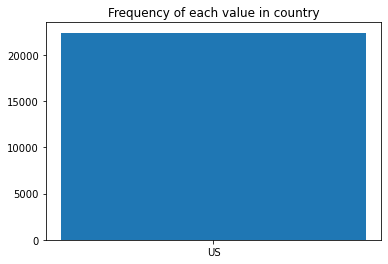

-------------------------
Fill Freq:
top 7:
    US  54567
    France  22093
    Italy  19540
    Spain  6645
    Portugal  5691
    Chile  4472
    Argentina  3800


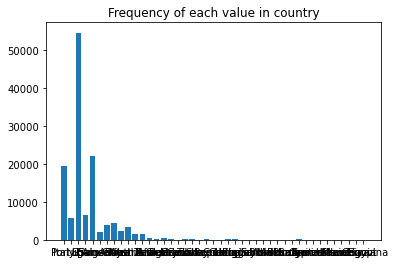

-------------------------
Attr Relation
top 7:
    US  22524


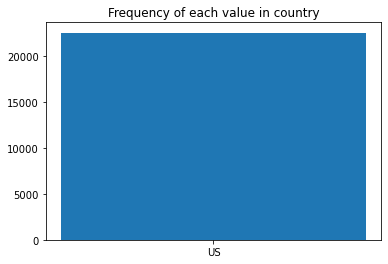

In [49]:
# country对比 标称属性
def compare_country(data):
	country_count = cal_count(data, "country")
	# 输出频率前7的country
	print_top_7(country_count)
	# 绘制条形图
	plt.title("Frequency of each value in country")
	plt.bar(country_count.keys(), country_count.values())
	plt.show()


print("Eliminate:")
compare_country(data_elim)
print("-------------------------")
print("Fill Freq:")
compare_country(data_fill_freq)
print("-------------------------")
print("Attr Relation")
compare_country(data_fill_attr_relation)
# print("-------------------------")
# print("Object Relation:")
# compare_country(data_fill_obj_similarity)
# print("-------------------------")


Eliminate:
top 7:
    Virginie Boone  6422
    Paul Gregutt  5989
    Matt Kettmann  4479
    Sean P. Sullivan  3357
    Jim Gordon  1915
    Susan Kostrzewa  97
    Joe Czerwinski  69


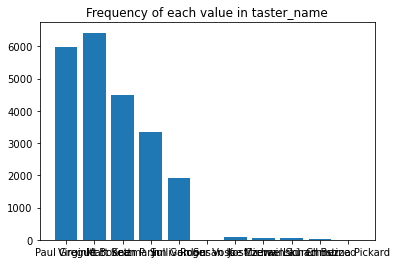

-------------------------
Fill Freq:
top 7:
    Virginie Boone  35781
    Roger Voss  25514
    Michael Schachner  15134
    Kerin O’Keefe  10776
    Paul Gregutt  9532
    Matt Kettmann  6332
    Joe Czerwinski  5147


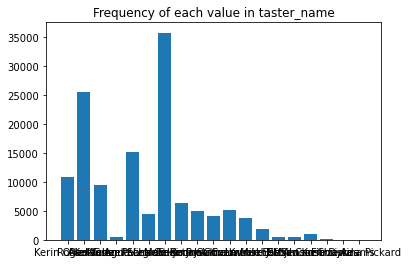

-------------------------
Attr Relation
top 7:
    Virginie Boone  6447
    Paul Gregutt  6009
    Matt Kettmann  4536
    Sean P. Sullivan  3389
    Jim Gordon  1918
    Susan Kostrzewa  97
    Joe Czerwinski  69


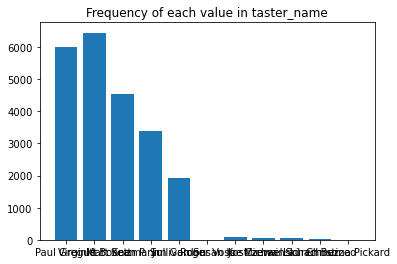

In [50]:
# taster_name对比 标称属性
def compare_taster_name(data):
	taster_name_count = cal_count(data, "taster_name")
	# 输出频率前7的taster_name
	print_top_7(taster_name_count)
	# 绘制条形图
	plt.title("Frequency of each value in taster_name")
	plt.bar(taster_name_count.keys(), taster_name_count.values())
	plt.show()


print("Eliminate:")
compare_taster_name(data_elim)
print("-------------------------")
print("Fill Freq:")
compare_taster_name(data_fill_freq)
print("-------------------------")
print("Attr Relation")
compare_taster_name(data_fill_attr_relation)
# print("-------------------------")
# print("Object Relation:")
# compare_taster_name(data_fill_obj_similarity)
# print("-------------------------")


**总结**
我们使用四种方法，对缺失数据进行处理，并进行了横向对比分析，以明确各类缺失数据处理方法的特点和优劣。对于直接剔除缺失部分的方法，虽然较为简单但是在缺失数值较多的情况下，剔除数据可能会造成数据数值失真的情况出现。对于高频值填补的方法，计算复杂度稍高，但是不会影响属性的均值统计量。同时使用高频值填充无法充分考虑对象间的相关性。对于属性相关关系填充的方法，适用于属性间相关关系明确的属性缺失值填充。这需要数据分析者预先设定并明确属性间的相关关系。对于相关关系不明确的，可以借用协方差等工具进行相关性分析，以确定缺失值。但是此方法也可能存在比较大的误差。对于通过数据对象间的相似性填充缺失值的方法，此方法对缺失值的填充应比较准确，但是需要遍历所有数据对象，以找到最接近的对象，因此时间复杂度非常大。在实验过程中，此方法没有在有限的时间(30min)内得到正确的结果。